<a href="https://colab.research.google.com/github/fikhrihanif/DIF62130_Kelas_A_25_2311533007/blob/main/Praktikum2/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

#load dataset
dataset_url = 'https://raw.githubusercontent.com/fikhrihanif/DIF62130_Kelas_A_25_2311533007/refs/heads/main/dataset/diabetes.csv'
df = pd.read_csv(dataset_url)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
#split dataset in feature and target variable
feature_cols = ['Pregnancies','Glucose','BloodPressure','Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] #Feature
y = df.Outcome # Target Variabel

In [14]:
print (X.shape)
print (y.shape)

(768, 7)
(768,)


Splitting Data

In [21]:
#Split X and y into trining and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)

Model development and prediction

In [22]:
#import the class
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X_train, y_train)

LogisticRegression()

Model Evaluation using Confusion Matrix

In [23]:
from sklearn.linear_model import LogisticRegression

#instantiate the model
logreg = LogisticRegression()

#fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [24]:
#import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[134,  13],
       [ 35,  49]])

Text(0.5, 23.52222222222222, 'Predicted label')

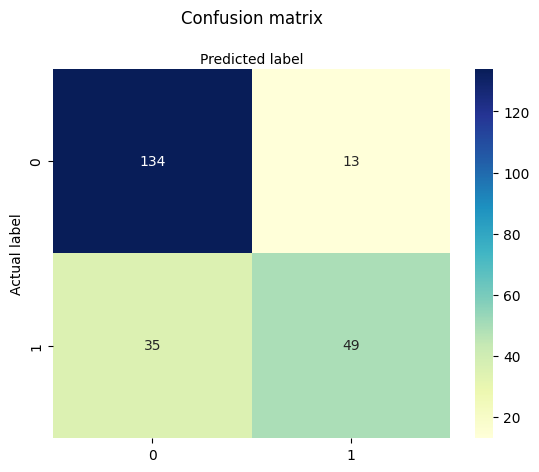

In [26]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] #name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))
#

                  precision    recall  f1-score   support

without diabetes       0.79      0.91      0.85       147
   with diabetes       0.79      0.58      0.67        84

        accuracy                           0.79       231
       macro avg       0.79      0.75      0.76       231
    weighted avg       0.79      0.79      0.78       231

